In [2]:
# Flow_from_directory
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.regularizers import L2
import pandas as pd


In [3]:
IMAGE_SIZE = 224

# Train data with validation split with data augmentation
train_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                     width_shift_range=0.2, height_shift_range=0.2,
                                     horizontal_flip=True, vertical_flip=True,
                                     brightness_range=[0.4,1.5],
                                     )
train= train_generator.flow_from_directory('data/full/calc/train/', target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=16, class_mode='binary', subset='training')
val= train_generator.flow_from_directory('data/full/calc/train/', target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=16, class_mode='binary', subset='validation')

Found 36 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [4]:
pretrained_model = ResNet152(include_top=False,
                             pooling='max',
                             classes=2,
                             weights='imagenet'
                             )

model_layers = [
    pretrained_model,
    Dense(units=512, activation='relu', kernel_regularizer=L2(0.0001), bias_regularizer=L2(0.001)),
    Dropout(0.5),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.0001), bias_regularizer=L2(0.0001)),
    Dense(units=1, activation='sigmoid'),
]

model = Sequential(model_layers)

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(train, validation_data=val, epochs=30)

Epoch 1/30


<Figure size 432x288 with 0 Axes>

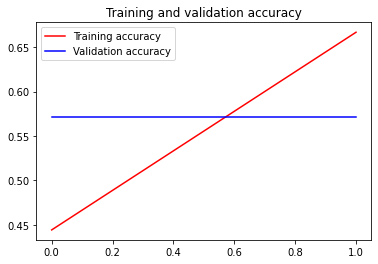

<Figure size 432x288 with 0 Axes>

In [6]:
# Plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
# save model
model.save('model.h5')